## Problem Statement

Customer churn is a major problem that many companies face today. Finance, Telecom or Hospitality - every industry or business is affected, not only in short term but also long term, in terms of revenues of companies and eventually future growth. It is one of the most important metrics about customer retention for a company.

Customer Churn Rate is important, as it costs more to acquire new customers than it does to retain existing customers.  By keeping customer management costs low, a company can focus it’s time and effort into improving the features of their product and the quality of their services, which will ultimately improve the health of the company financially.

This case study is about predicting whether certain customers are more likely to stop using the service in the future and create a model that can predict if a certain customer will drop the service. We are following a standard  Machine learning pipeline as defined below.

- Exploratory data analysis
    - Check basic data information
    - Review the summary statistics
    - Check duplicates and handle if any
    - Check Null values and handle if any 
    - Data transformation
    - Visualization
    - Separate into independent and dependent variables
    - Feature encoding for categorical variables
    - Data scaling
- Split data into train and test sets
    - Dimensionality reduction by Feature Importance RFECV (Recursive Feature Elimination with Cross-Validation)
    - Handling imbalanced data with SMOTE
- Save data into CSV format

- For the modelling part, we are using 4 different supervised machine learning algorithms followed by an Ensemble model. 

- For the model evaluations, we have used multiple metrics- accuracy, f1-score, recall, precision, confusion matrix and ROC_AUC curve.

## Dataset 

The dataset contains the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually.

## Exploratory Data Analysis

#### Load the libraries

In [1]:
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Load dataset

In [2]:
churn = pd.read_csv("churn.all2")

#look at the top 5 rows
churn.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
#look at the bottom 5 rows
churn.tail()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False.
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True.
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False.
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False.
4999,VT,86,415,373-8058,no,yes,34,129.4,102,22.00,...,104,22.7,154.8,100,6.97,9.3,16,2.51,0,False.


##### Basic data check

In [4]:
#look at the number of rows and columns
churn.shape

(5000, 21)

There are 5000 rows and 21 columns. 

Out of the 21 columns - "churned" is the target or dependent variable, False - refers to not churned, True - churned.

Rest all 20 columns are the independent variables.

In [5]:
#check information about the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

As we can see, the data contains only 1 null value(total_intl_charge). There are two types of numerical data in the dataframe — int64 and float64. The categorical data is mentioned against object datatype.

In [6]:
#computes and displays summary statistics on all of the numeric variables
churn.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,200.391620,99.919200,9.017732,10.261780,4.435200,2.771146,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,50.527789,19.958686,2.273763,2.761396,2.456788,0.745580,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


We can see the below statistics for the numeric columns. If "Include=all" is specified, we can extract all this information about all columns.

- mean
- median
- standard deviation
- minimum
- maximum
- percentiles
- etc

In [7]:
#any duplicates
churn.duplicated().any()

False

There are no duplicates in the data.

##### Handle missing value

In [8]:
#detect if any missing values
churn.isnull().any()

state                            False
account_length                   False
area_code                        False
phone_number                     False
intl_plan                        False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                 True
number_customer_service_calls    False
churned                          False
dtype: bool

There are missing values only for column - total_intl_charge.

In [9]:
#count the number of missing values
churn.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                1
number_customer_service_calls    0
churned                          0
dtype: int64

There is only 1 missing value in the column - total_intl_charge.

In [10]:
#check for any other invalid data charaters
#Visual exploration shows the presence of ? in total_eve_charge
churn[churn['total_eve_charge']=='?']

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,?,203.9,118,9.18,6.3,6,1.70,0,False.
20,FL,147,415,396-5800,no,no,0,155.1,117,26.37,...,93,?,208.8,133,9.40,10.6,4,2.86,0,False.
34,OK,57,408,395-2854,no,yes,25,176.8,94,30.06,...,75,?,213.5,116,9.61,8.3,4,2.24,0,False.
50,IA,52,408,413-4957,no,no,0,191.9,108,32.62,...,96,?,236.8,87,10.66,7.8,5,2.11,3,False.


In [11]:
#replace the ? with None 
churn['total_eve_charge']=np.where(churn['total_eve_charge']=='?',None,churn['total_eve_charge'])

#check the count of nulls again
churn.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 5
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                1
number_customer_service_calls    0
churned                          0
dtype: int64

In [12]:
#covert the string value to float
churn['total_eve_charge_float']=churn['total_eve_charge'].astype(float)

In [13]:
#fill up missing data, using mean 
churn['total_eve_charge_new']=churn['total_eve_charge_float'].fillna(churn['total_eve_charge_float'].mean())
churn['total_intl_charge_new']=churn['total_intl_charge'].fillna(churn['total_intl_charge'].mean())

In [14]:
#check the new columns
churn[['total_eve_charge_new','total_intl_charge_new']].head()

,total_eve_charge_new,total_intl_charge_new
0,16.780000,2.70
1,17.052324,3.70
2,10.300000,3.29
3,5.260000,1.78
4,12.610000,2.73


In [15]:
#drop the redundant columns
churn = churn.drop(labels=['total_eve_charge','total_eve_charge_float','total_intl_charge'],axis=1)
churn.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned,total_eve_charge_new,total_intl_charge_new
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,244.7,91,11.01,10.0,3,1,False.,16.780000,2.70
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,254.4,103,11.45,13.7,3,1,False.,17.052324,3.70
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,162.6,104,7.32,12.2,5,0,False.,10.300000,3.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,196.9,89,8.86,6.6,7,2,False.,5.260000,1.78
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,186.9,121,8.41,10.1,3,3,False.,12.610000,2.73


##### Data Transformation

In [16]:
#remove blanks from columns, if any
#this is needed for string formatting
churn_trimmed = churn.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
churn_trimmed.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned,total_eve_charge_new,total_intl_charge_new
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,244.7,91,11.01,10.0,3,1,False.,16.780000,2.70
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,254.4,103,11.45,13.7,3,1,False.,17.052324,3.70
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,162.6,104,7.32,12.2,5,0,False.,10.300000,3.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,196.9,89,8.86,6.6,7,2,False.,5.260000,1.78
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,186.9,121,8.41,10.1,3,3,False.,12.610000,2.73


In [17]:
#remove dot character
churn_trimmed['churned'] = churn_trimmed['churned'].astype('str').str.replace('.', '')
churn_trimmed.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned,total_eve_charge_new,total_intl_charge_new
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,244.7,91,11.01,10.0,3,1,False,16.780000,2.70
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,254.4,103,11.45,13.7,3,1,False,17.052324,3.70
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,162.6,104,7.32,12.2,5,0,False,10.300000,3.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,196.9,89,8.86,6.6,7,2,False,5.260000,1.78
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,186.9,121,8.41,10.1,3,3,False,12.610000,2.73


In [18]:
#convert the True/False value of target variable to 1/0
churn_trimmed['churned'] = churn_trimmed[['churned']].applymap(lambda x: '1' if x=='True' else '0')
churn_trimmed['churned'].unique()

array(['0', '1'], dtype=object)

In [19]:
#convert the Yes/No value of intl_plan variable to 1/0
churn_trimmed['intl_plan'] = churn_trimmed[['intl_plan']].applymap(lambda x: 1 if x=='yes' else 0)
churn_trimmed['intl_plan'].unique()

array([0, 1], dtype=int64)

In [20]:
#convert the Yes/No value of voice_mail_plan variable to 1/0
churn_trimmed['voice_mail_plan'] = churn_trimmed[['voice_mail_plan']].applymap(lambda x: 1 if x=='yes' else 0)
churn_trimmed['voice_mail_plan'].unique() 

array([1, 0], dtype=int64)

In [21]:
#extract the categorical columns
cat_cols = churn_trimmed.select_dtypes(include='O').columns
len(cat_cols)

3

In [22]:
#extract the numerical columns
num_cols = churn_trimmed.select_dtypes(exclude='O').columns
#num_cols = churn_trimmed.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['account_length', 'area_code', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'total_eve_charge_new',
       'total_intl_charge_new'],
      dtype='object')

##### Visualization

This step helps get a visual idea of data and its relationships.

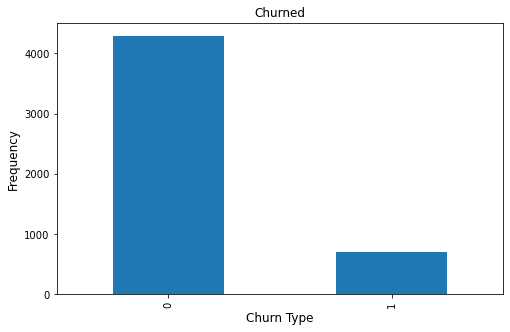

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
churn_trimmed["churned"].value_counts().plot(kind='bar')
plt.title('Churned')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Churn Type', fontsize=12)
plt.show()


Text(0.5, 1.0, 'Percentage of churn')

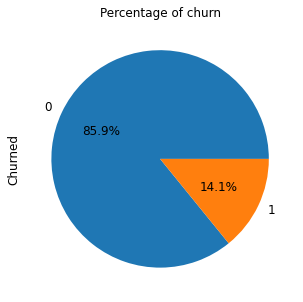

In [24]:
ax = (churn_trimmed["churned"].value_counts()*100.0 /len(churn_trimmed))\
.plot\
.pie(autopct='%.1f%%', \
     labels = ['0', '1'],\
     figsize =(5,5), \
     fontsize = 12 )                                                                          
 
ax.set_ylabel('Churned',fontsize = 12)
ax.set_title('Percentage of churn', fontsize = 12)

The above plots show that the data is imbalanced. We will handle this imbalance, later in the pipeline.

Almost ~86% cases belong to churn=0 case while ~14% cases belong to churn=1 case.

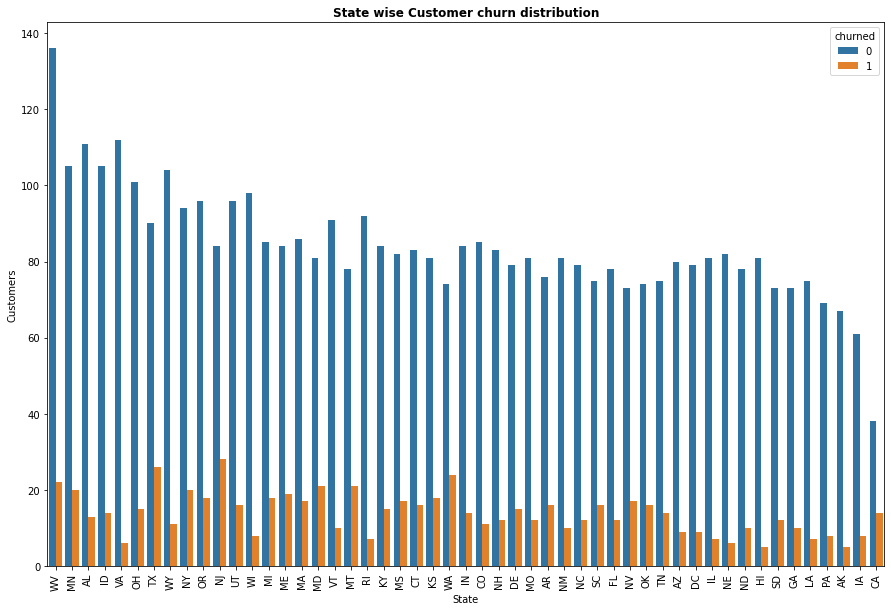

In [25]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,10))
sns.countplot(data = churn_trimmed, x='state', order=churn_trimmed['state'].value_counts().index,hue='churned')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.title('State wise Customer churn distribution', fontsize=12, fontweight='bold')
plt.show()

The above plot shows the 0/1 count-wise distribution per state. As expected the customer churn is higher in NJ, WA, CA, TX, which are densely populated states.

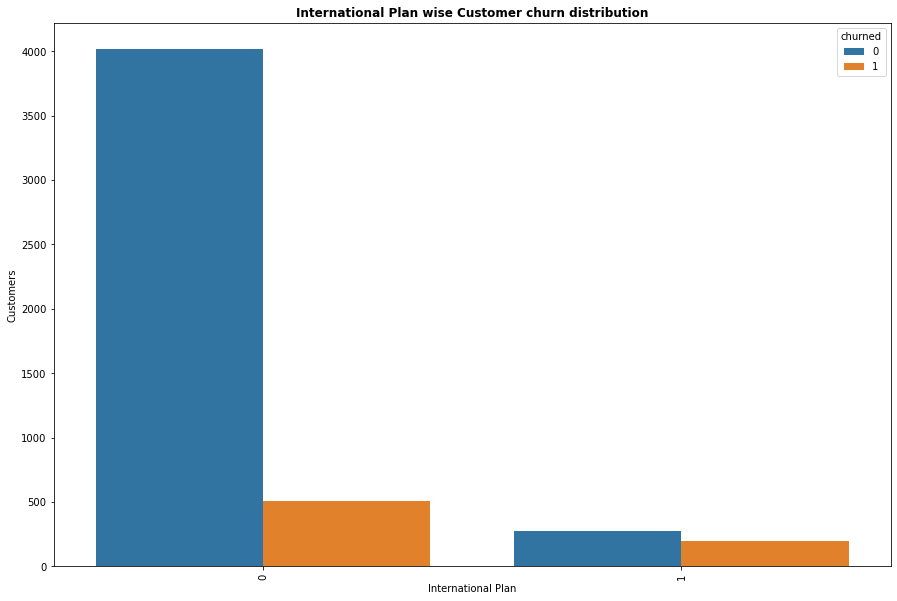

In [26]:
fig, ax=plt.subplots(figsize=(15,10))
sns.countplot(data = churn_trimmed, x='intl_plan', order=churn_trimmed['intl_plan'].value_counts().index,  hue='churned')
plt.xticks(rotation=90)
plt.xlabel('International Plan', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.title('International Plan wise Customer churn distribution', fontsize=12, fontweight='bold')
plt.show()

The above plot shows the 0/1 count-wise distribution per international plan. The number of customers who did not churn is higher.

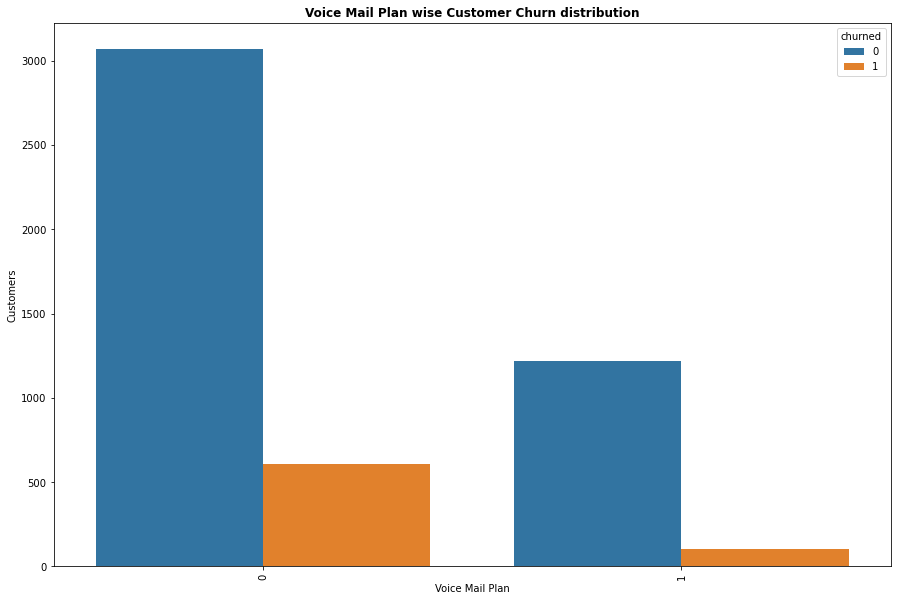

In [27]:
fig, ax=plt.subplots(figsize=(15,10))
sns.countplot(data = churn_trimmed, x='voice_mail_plan', order=churn_trimmed['voice_mail_plan'].value_counts().index,  hue='churned')
plt.xticks(rotation=90)
plt.xlabel('Voice Mail Plan', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.title('Voice Mail Plan wise Customer Churn distribution', fontsize=12, fontweight='bold')
plt.show()

The above plot shows the 0/1 count-wise distribution per voice mail plan. The number of customers who did not churn is higher.

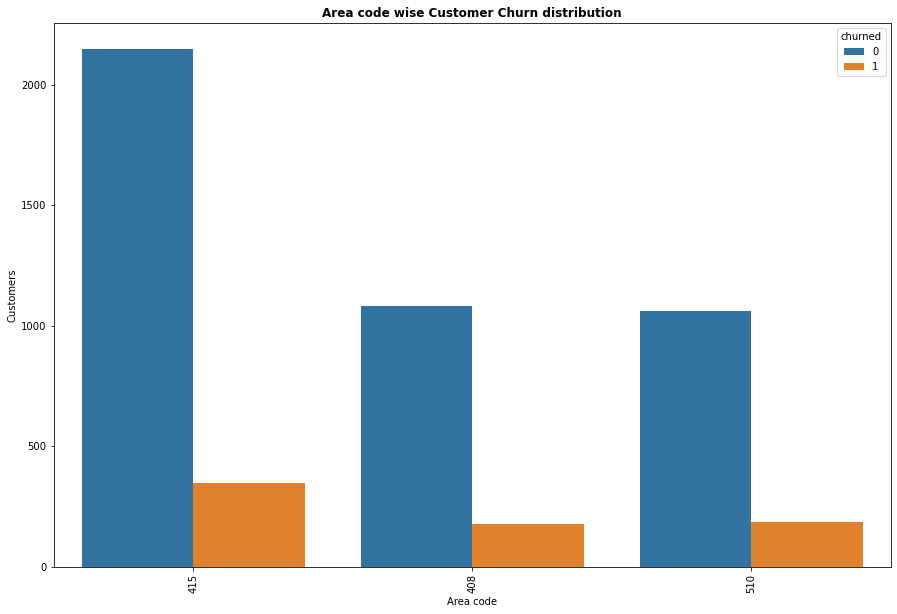

In [28]:
fig, ax=plt.subplots(figsize=(15,10))
sns.countplot(data = churn_trimmed, x='area_code', order=churn_trimmed['area_code'].value_counts().index,  hue='churned')
plt.xticks(rotation=90)
plt.xlabel('Area code', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.title('Area code wise Customer Churn distribution', fontsize=12, fontweight='bold')
plt.show()

The above plot shows the 0/1 count-wise distribution per are code. The number of customers who churned is higher in the area code 415.

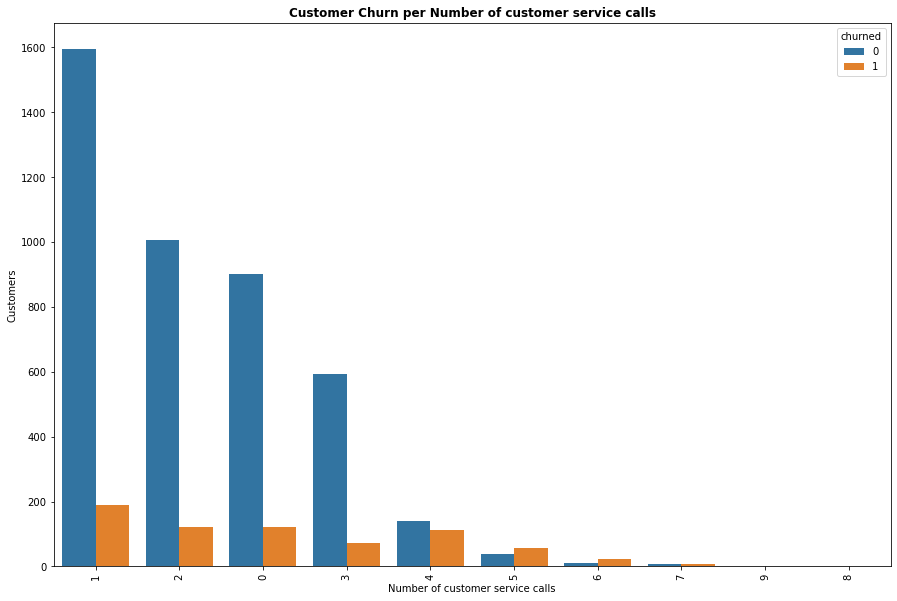

In [29]:
fig, ax=plt.subplots(figsize=(15,10))
sns.countplot(data = churn_trimmed, x='number_customer_service_calls', order=churn_trimmed['number_customer_service_calls'].value_counts().index,  hue='churned')
plt.xticks(rotation=90)
plt.xlabel('Number of customer service calls', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.title('Customer Churn per Number of customer service calls', fontsize=12, fontweight='bold')
plt.show()

The above plot shows the 0/1 count-wise distribution per Number of customer service calls. The number of customers who churned is higher for greater than 4 customer service calls. 

In [30]:
#extract only numerical independent features
features = num_cols.difference(['churned'])
len(features)

18

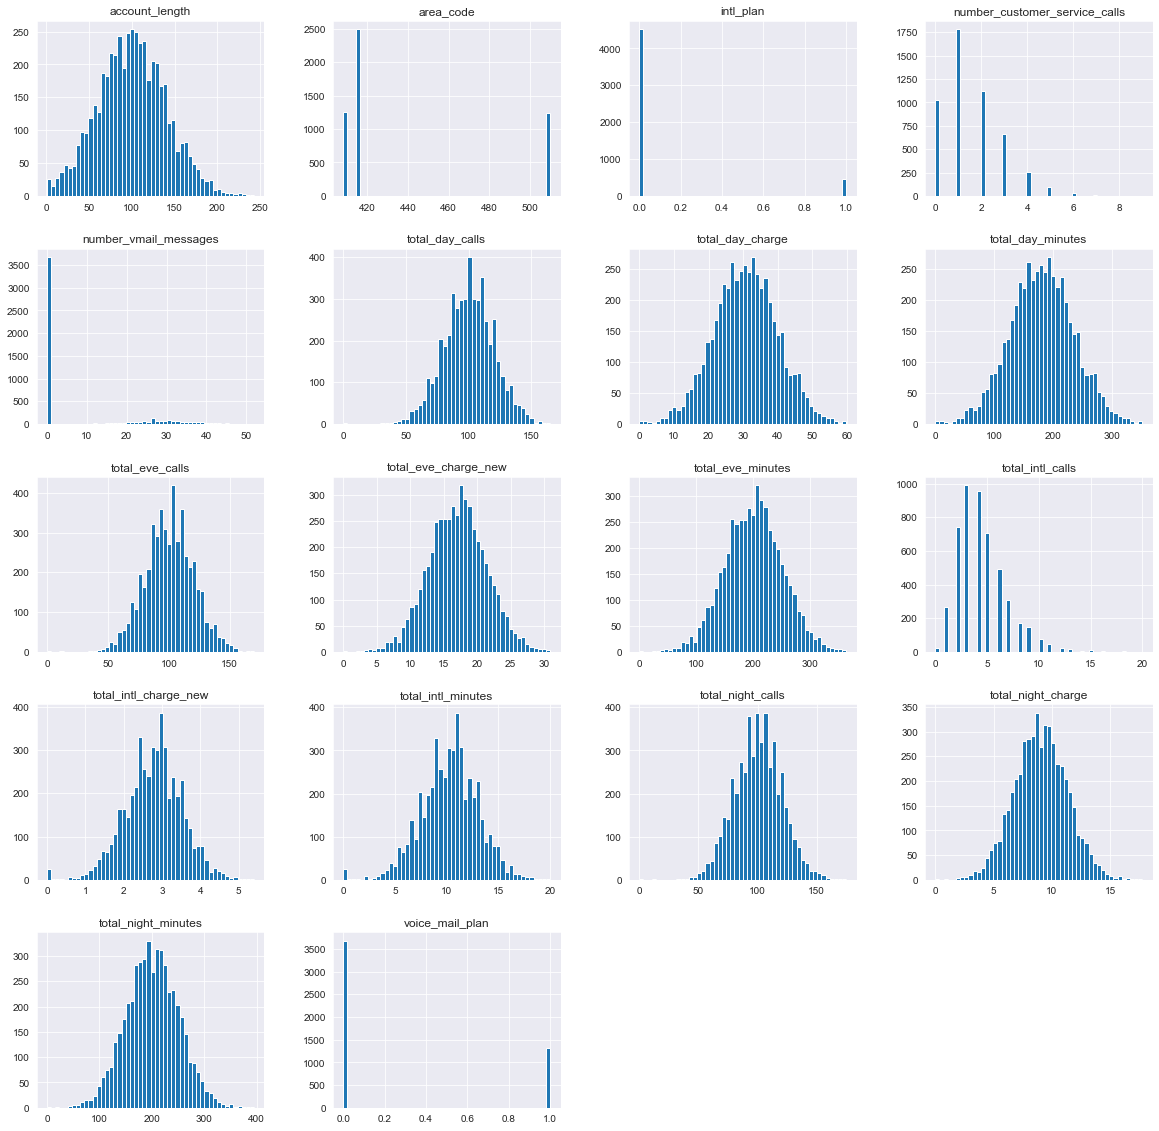

In [31]:
#plot histograms for all numerical independent features to understand the distribution
import seaborn as sns
sns.set_style('dark')
temp = churn_trimmed[features]
temp.hist(bins=50,figsize=(20,20))
plt.show()

Majority of the columns are showing normal distribution(close to bell-shaped curve)

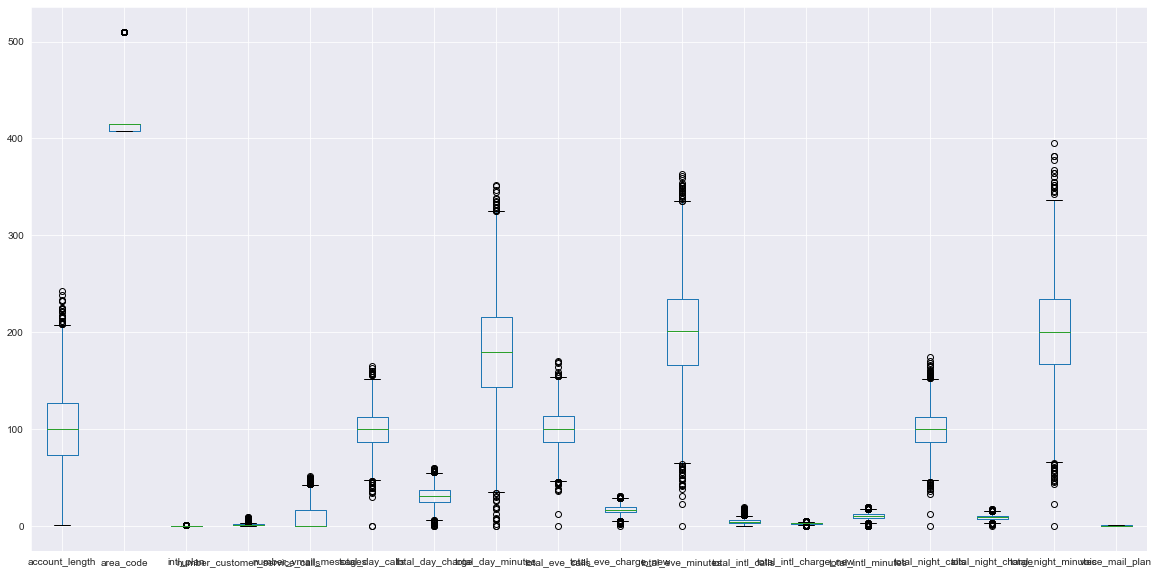

In [32]:
import seaborn as sns
plt.figure(figsize=(20,10))
temp = churn_trimmed[features]
temp.boxplot()
plt.show()

Most of the numerical columns have outliers. We will handle it later in the pipeline.

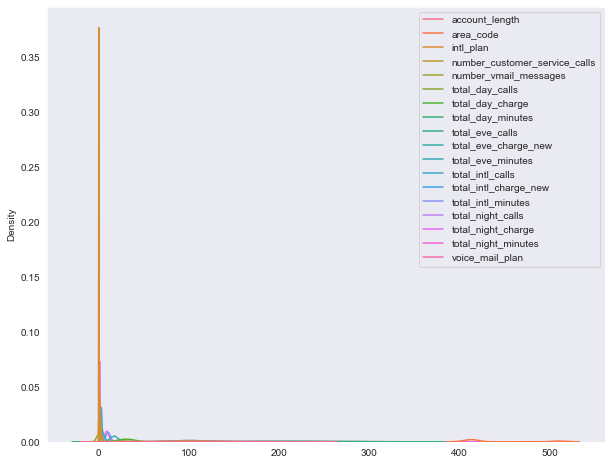

In [33]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.kdeplot(data=churn_trimmed[features])
plt.show()

A KDE plot represents the probability distribution of the data values as the area under the plotted curve. The distributions are almost right-skewed(mean is greater than the median).

##### Correlation analysis

Correlation is a statistical measure that expresses the strength of the relationship between two variables. The two main types of correlation are positive and negative. 

- Positive correlation occurs when two variables move in the same direction; as one increases, so do the other. 
- A negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

A correlation heatmap is created to understand the linear relationship between different variables.

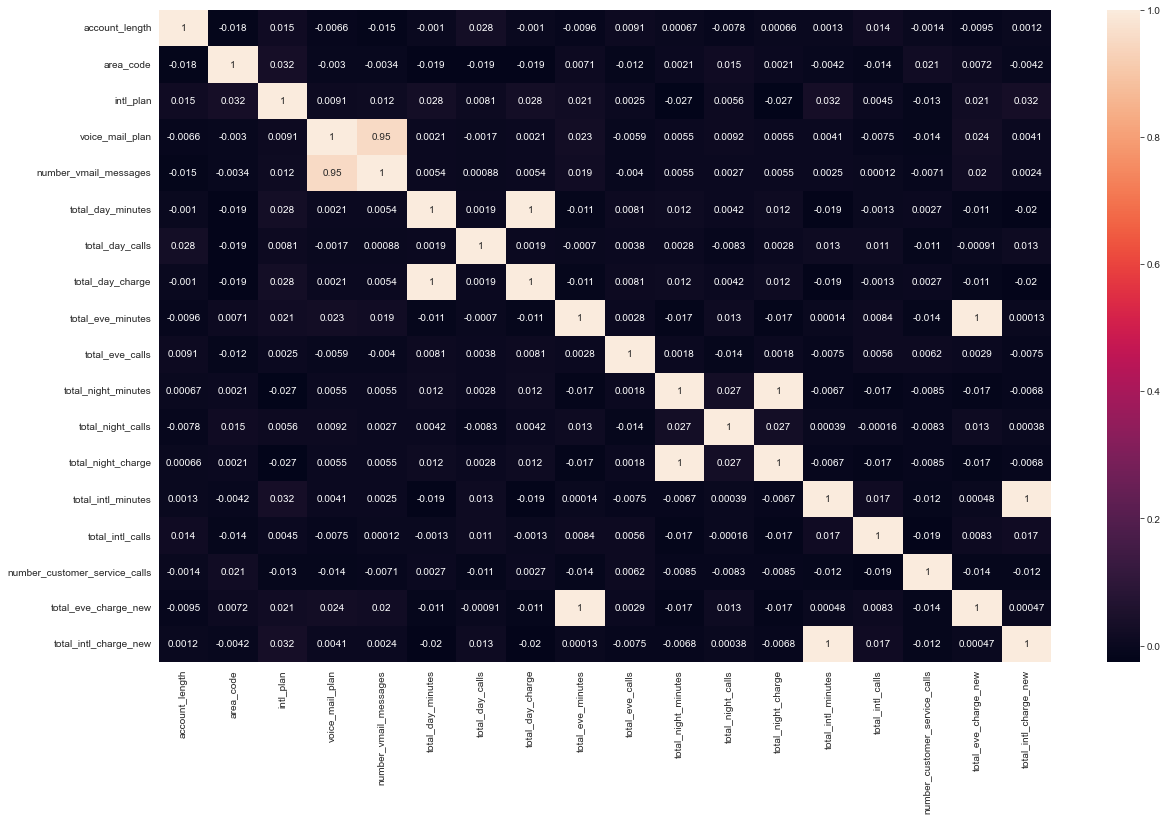

In [34]:
import seaborn as sns
plt.figure(figsize=(20,12))
corr = churn_trimmed.corr()
sns.heatmap(corr, annot=True)
plt.show()

- Variables such as below, are having strong positive correlation. Generally speaking, a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.
    - total_day_charge & total_day_minutes, 
    - total_eve_charge & total_eve_minutes, 
    - total_night_charge & total_night_minutes, 
    - total_intl_charge & total_intl_minutes
    - voice_mail_plan & number_vmail_messages 
- None of the variable having strong negative correlations.
- There are several variables that have no correlation and whose correlation value is near 0.

We will do dimensionality reduction using feature importance to select the important features.

##### Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [35]:
churn_trimmed.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned,total_eve_charge_new,total_intl_charge_new
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,244.7,91,11.01,10.0,3,1,0,16.780000,2.70
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,254.4,103,11.45,13.7,3,1,0,17.052324,3.70
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,162.6,104,7.32,12.2,5,0,0,10.300000,3.29
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,196.9,89,8.86,6.6,7,2,0,5.260000,1.78
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,186.9,121,8.41,10.1,3,3,0,12.610000,2.73


In [36]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [37]:
# Encode labels in column 'species'.
churn_trimmed['state']= label_encoder.fit_transform(churn_trimmed['state'])

In [38]:
churn_trimmed.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned,total_eve_charge_new,total_intl_charge_new
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,244.7,91,11.01,10.0,3,1,0,16.780000,2.70
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,254.4,103,11.45,13.7,3,1,0,17.052324,3.70
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,162.6,104,7.32,12.2,5,0,0,10.300000,3.29
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,196.9,89,8.86,6.6,7,2,0,5.260000,1.78
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,186.9,121,8.41,10.1,3,3,0,12.610000,2.73


##### Separate into independent and dependent variables

In [39]:
#target variable
y=churn_trimmed['churned']
y.shape

(5000,)

In [40]:
#indepemdent features
#since there are 5000 unique phone-numbers, there would be no significant contribution to the data training, we are going to drop it. 
X=churn_trimmed[churn_trimmed.columns.difference(['churned','phone_number'])]
X.columns

Index(['account_length', 'area_code', 'intl_plan',
       'number_customer_service_calls', 'number_vmail_messages', 'state',
       'total_day_calls', 'total_day_charge', 'total_day_minutes',
       'total_eve_calls', 'total_eve_charge_new', 'total_eve_minutes',
       'total_intl_calls', 'total_intl_charge_new', 'total_intl_minutes',
       'total_night_calls', 'total_night_charge', 'total_night_minutes',
       'voice_mail_plan'],
      dtype='object')

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   area_code                      5000 non-null   int64  
 2   intl_plan                      5000 non-null   int64  
 3   number_customer_service_calls  5000 non-null   int64  
 4   number_vmail_messages          5000 non-null   int64  
 5   state                          5000 non-null   int32  
 6   total_day_calls                5000 non-null   int64  
 7   total_day_charge               5000 non-null   float64
 8   total_day_minutes              5000 non-null   float64
 9   total_eve_calls                5000 non-null   int64  
 10  total_eve_charge_new           5000 non-null   float64
 11  total_eve_minutes              5000 non-null   float64
 12  total_intl_calls               5000 non-null   i

##### Scaling

- As we know most of the supervised and unsupervised learning methods make decisions according to the data sets applied to them and often the algorithms calculate the distance between the data points to make better inferences out of the data.

- In the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. 

- Hence we need to perform feature scaling as features of different scales can give a distorted picture of distance between data points.

- StandardScaler changes the shape of data while keeping data into range of 0 and 1. It can eliminate the outliers.

- The standard practice is to use StandardScaler for normally distributed data, otherwise use MinMaxScaler.

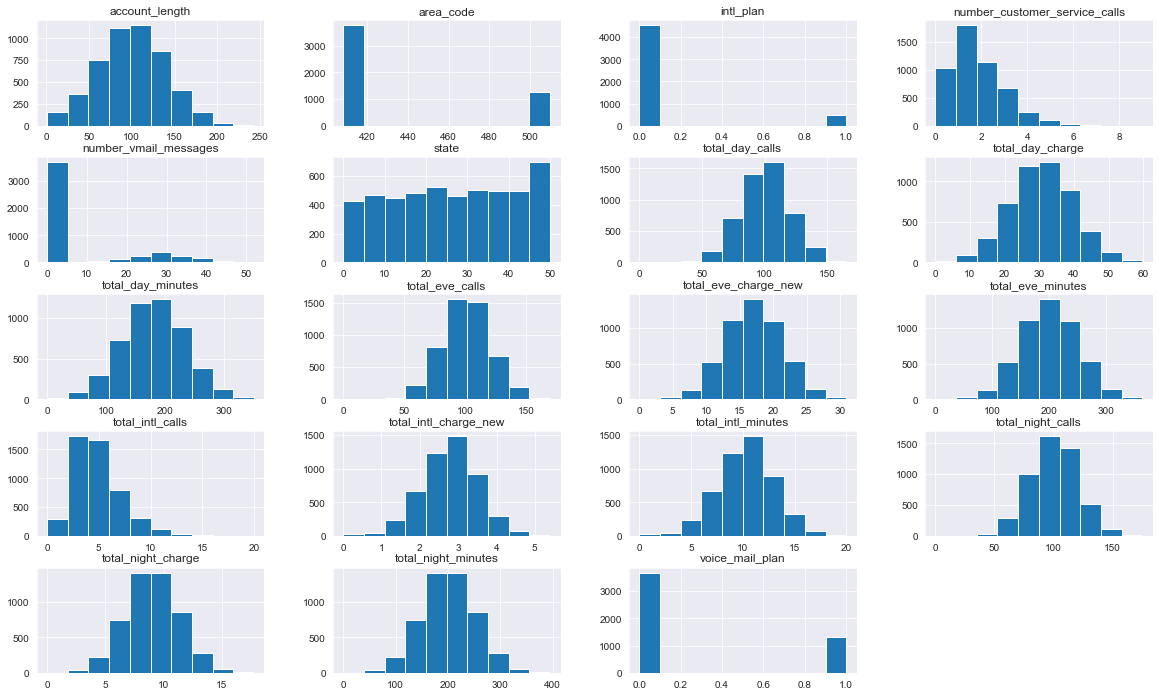

In [42]:
#test for normality
import matplotlib.pyplot as plt
X.hist(figsize=(20,12))
plt.show()

Most of the numeric features are showing normality. Hence we will use standard scaling.

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [44]:
#make a copy of the original data
import copy
X_scaled = copy.deepcopy(X)
X_scaled.columns

Index(['account_length', 'area_code', 'intl_plan',
       'number_customer_service_calls', 'number_vmail_messages', 'state',
       'total_day_calls', 'total_day_charge', 'total_day_minutes',
       'total_eve_calls', 'total_eve_charge_new', 'total_eve_minutes',
       'total_intl_calls', 'total_intl_charge_new', 'total_intl_minutes',
       'total_night_calls', 'total_night_charge', 'total_night_minutes',
       'voice_mail_plan'],
      dtype='object')

In [45]:
#get numeric data
num_cols3 = X_scaled.select_dtypes(exclude=['O']).columns
num_cols3

Index(['account_length', 'area_code', 'intl_plan',
       'number_customer_service_calls', 'number_vmail_messages', 'state',
       'total_day_calls', 'total_day_charge', 'total_day_minutes',
       'total_eve_calls', 'total_eve_charge_new', 'total_eve_minutes',
       'total_intl_calls', 'total_intl_charge_new', 'total_intl_minutes',
       'total_night_calls', 'total_night_charge', 'total_night_minutes',
       'voice_mail_plan'],
      dtype='object')

In [46]:
#update the cols with their normalized values
X_scaled[num_cols3] =  sc.fit_transform(X_scaled[num_cols3])
X_scaled.head()

,account_length,area_code,intl_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge_new,total_eve_minutes,total_intl_calls,total_intl_charge_new,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
0,0.698941,-0.519166,-0.323240,-0.436676,1.273145,-0.675476,0.502824,1.574074,1.573802,-0.060077,-6.340088e-02,-0.064032,-0.584236,-0.095443,-0.094809,-0.446928,0.876286,0.876999,1.667120
1,0.169849,-0.519166,-0.323240,-0.436676,1.346973,0.608134,1.158422,-0.347082,-0.346802,0.141693,4.135605e-15,-0.101621,-0.584236,1.246063,1.245227,0.154374,1.069818,1.068992,1.667120
2,0.925695,-0.519166,-0.323240,-1.202236,-0.572549,0.337900,0.704546,1.171286,1.171125,0.494791,-1.572035e+00,-1.571562,0.229917,0.696045,0.701969,0.204483,-0.746737,-0.748012,-0.599837
3,-0.409634,-0.685024,3.093675,0.328885,-0.572549,0.608134,-1.463971,2.210457,2.210292,-0.614946,-2.745416e+00,-2.744745,1.044069,-1.329629,-1.326194,-0.547145,-0.069377,-0.069110,-0.599837
4,-0.636388,-0.519166,3.093675,1.094445,-0.572549,0.675692,0.654116,-0.252115,-0.252163,1.100103,-1.034235e+00,-1.035419,-0.584236,-0.055198,-0.058592,1.056327,-0.267307,-0.267041,-0.599837


In [47]:
X_scaled.describe()

,account_length,area_code,intl_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge_new,total_eve_minutes,total_intl_calls,total_intl_charge_new,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.908784e-18,-6.239897e-16,1.751488e-16,2.414069e-16,-1.445111e-15,-1.576517e-17,2.450123e-16,1.721734e-16,-2.168044e-16,-1.414757e-16,9.814372e-18,-6.958878e-17,8.419931e-16,-2.331690e-16,6.835532e-16,-1.854033e-16,-2.307043e-16,-3.546941e-16,-5.687451e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.500809e+00,-6.850237e-01,-3.232402e-01,-1.202236e+00,-5.725491e-01,-1.756411e+00,-5.044547e+00,-3.345613e+00,-3.345541e+00,-5.053895e+00,-3.970017e+00,-3.969366e+00,-1.805464e+00,-3.717509e+00,-3.716529e+00,-5.006802e+00,-3.966392e+00,-3.966365e+00,-5.998368e-01
25%,-6.867774e-01,-6.850237e-01,-3.232402e-01,-4.366756e-01,-5.725491e-01,-8.781516e-01,-6.570810e-01,-6.789176e-01,-6.789640e-01,-6.653883e-01,-6.780295e-01,-6.778259e-01,-5.842358e-01,-6.320455e-01,-6.380673e-01,-6.473619e-01,-6.631663e-01,-6.629019e-01,-5.998368e-01
50%,-6.515398e-03,-5.191665e-01,-3.232402e-01,-4.366756e-01,-5.725491e-01,1.080935e-04,-1.482661e-03,-3.238457e-03,-3.505333e-03,-9.634537e-03,8.771419e-03,7.190246e-03,-1.771596e-01,1.187739e-02,1.384221e-02,4.048768e-03,9.975653e-04,1.658659e-04,-5.998368e-01
75%,6.737466e-01,-5.191665e-01,-3.232402e-01,3.288847e-01,6.825230e-01,8.783678e-01,6.541157e-01,6.658913e-01,6.663863e-01,6.965619e-01,6.612322e-01,6.620360e-01,6.369929e-01,6.289702e-01,6.295345e-01,6.554594e-01,6.783568e-01,6.790681e-01,1.667120e+00
max,3.596354e+00,1.731754e+00,3.093675e+00,5.687807e+00,3.266495e+00,1.621511e+00,3.276509e+00,3.177584e+00,3.177088e+00,3.521348e+00,3.226259e+00,3.226024e+00,6.336060e+00,3.526623e+00,3.526910e+00,3.762187e+00,3.849629e+00,3.851897e+00,1.667120e+00


Now the distance between different features are smaller.

## Split data into train and test sets

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

    - Train Dataset: Used to fit the machine learning model.
    - Test Dataset: Used to evaluate the fit machine learning model.
    
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))


((3750, 19), (3750,)) ((1250, 19), (1250,))


###### Feature Importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

- Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

- The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:
    - Better understanding the data.
    - Better understanding a model.
    - Reducing the number of input features.

- One way to apply feature importance technique is RFECV (Recursive Feature Elimination with Cross-Validation). It performs recursive feature elimination with cross-validation loop to extract the optimal features. Scikit-learn provides RFECV class to implement RFECV method to find the most important features in a given dataset.

- Selecting optimal features is important part of data preparation in machine learning. It helps us to eliminate less important part of the data and reduce a training time in large datasets.



In [49]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
rfecv = RFECV(estimator=RandomForestClassifier(), #requires estimator model
              cv=5)
rfecv

RFECV(cv=5, estimator=RandomForestClassifier())

In [50]:
#fit on training X and y data
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestClassifier())

In [51]:
#ranking property gives us ranking position of a each feature. Optimal features are labeled rank 1
print("Feature ranking: ", rfecv.ranking_)

Feature ranking:  [2 8 1 1 1 6 3 1 1 4 1 1 1 1 1 5 1 1 7]


In [52]:
#get_support() function helps us to extract the selected features
mask = rfecv.get_support()
mask

array([False, False,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False])

In [53]:
#extract best features
features = X_train.columns 
best_features = features[mask]
best_features

Index(['intl_plan', 'number_customer_service_calls', 'number_vmail_messages',
       'total_day_charge', 'total_day_minutes', 'total_eve_charge_new',
       'total_eve_minutes', 'total_intl_calls', 'total_intl_charge_new',
       'total_intl_minutes', 'total_night_charge', 'total_night_minutes'],
      dtype='object')

In [54]:
print("All features: ", X_train.shape[1])
print(features)

All features:  19
Index(['account_length', 'area_code', 'intl_plan',
       'number_customer_service_calls', 'number_vmail_messages', 'state',
       'total_day_calls', 'total_day_charge', 'total_day_minutes',
       'total_eve_calls', 'total_eve_charge_new', 'total_eve_minutes',
       'total_intl_calls', 'total_intl_charge_new', 'total_intl_minutes',
       'total_night_calls', 'total_night_charge', 'total_night_minutes',
       'voice_mail_plan'],
      dtype='object')


In [55]:
print("Selected best: ", best_features.shape[0])
print(best_features)

Selected best:  12
Index(['intl_plan', 'number_customer_service_calls', 'number_vmail_messages',
       'total_day_charge', 'total_day_minutes', 'total_eve_charge_new',
       'total_eve_minutes', 'total_intl_calls', 'total_intl_charge_new',
       'total_intl_minutes', 'total_night_charge', 'total_night_minutes'],
      dtype='object')


In [56]:
X_train = X_train[best_features]
#X_train_best.head()
X_train.shape

(3750, 12)

In [57]:
X_test = X_test[best_features]
X_test.head()
X_test.shape

(1250, 12)

##### Imbalanced data handling

Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class).

Generally, the minority/positive class is the class of interest and we aim to achieve the best results in this class rather. If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

In this case study, we have applied SMOTE.

###### SMOTE - Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. 

The SMOTE algorithm works like this:

- Select a random sample from the minority group.
- Determine the k nearest neighbours for the observations in this sample.
= Then, using one of those neighbours, determine the vector between the current data point and the chosen neighbour.
- The vector is multiplied by a random number between 0 and 1.
- Add this to the current data point to get the synthetic data point.
    
This operation is essentially the same as moving the data point slightly in the direction of its neighbour. This ensures that our synthetic data point is not an exact replica of an existing data point, while also ensuring that it is not too dissimilar from known observations in our minority class.

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)
print((X_train_resampled.shape,y_train_resampled.shape),(X_test.shape,y_test.shape))


((6434, 12), (6434,)) ((1250, 12), (1250,))


In [59]:
y_train_resampled.value_counts()

0    3217
1    3217
Name: churned, dtype: int64

## Save data to csv

In [60]:
X_train_resampled.to_csv('X_train.csv')

In [61]:
y_train_resampled.to_csv('y_train.csv')

In [62]:
X_test.to_csv('X_test.csv')

In [63]:
y_test.to_csv('y_test.csv')

## Conclusion